In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os

In [35]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/utils")
import dataset_copy

In [36]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003")

filenames = dataset_copy.getfiles()
aout_11=dataset_copy.new_dataset(filenames, 223, 224)
aout_11

<xarray.Dataset>
Dimensions:     (time: 24, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-08-12 ... 2003-08-12T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    lon         (rlat, rlon) float32 -11.06 -11.04 -11.02 ... 34.27 34.31 34.34
    lat         (rlat, rlon) float32 29.61 29.61 29.62 29.62 ... 61.11 61.1 61.1
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 296.3 296.3 296.3 ... 286.8 287.0
    RELHUM_2M   (time, rlat, rlon) float32 90.97 90.97 90.96 ... 93.26 92.75
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

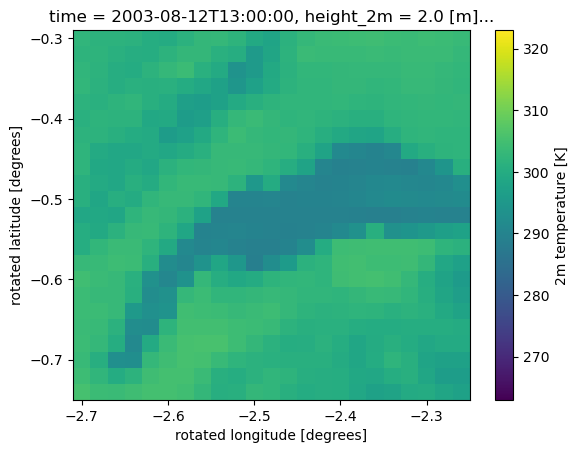

In [37]:
lat_bnd = [-0.75,-0.3]
lon_bnd = [-2.7, -2.25]
aout_11.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13).plot(vmin = 263, vmax = 323)
plt.show()


#On veut toutes les températures de 10h à 17h, on parcourt tous les points et on récup la temp :

leman=aout_11.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))

t2m_vector = geneve['T_2M'].values.flatten()

In [ ]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/data")

week_2km= xr.open_dataset("week_2km.nc")
week_12km=xr.open_dataset("week_12km.nc")
day_2km= week_2km.isel(time=slice(8,19))
day_12km=week_12km.isel(time=slice(8,19))

leman_juin=day_2km.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))

t2m_vector_2km = leman_juin['T_2M'].values.flatten()

leman_juin_coarse=day_12km.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))

t2m_vector_12km = leman_juin_coarse['T_2M'].values.flatten()


print("Température maximale pour la région du Léman sur la semaine du 22 au 28 juin pour une résolution de 2km:", max(t2m_week_fine),"K")
print("Température maximale pour la région du Léman sur la semaine du 22 au 28 juin pour une résolution de 12km:", max(t2m_week_coarse),"K")
print("Nombre de point de température supérieure à 305 :", len([t for t in t2m_week_fine if t >=305]))


In [ ]:
def into_vector(variable, lon_bnd, lat_bnd, dataset):
    return dataset.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))[variable].values.flatten()


t2m_week_fine=into_vector('T_2M',lon_bnd,lat_bnd,week_2km)
t2m_week_coarse=into_vector('T_2M',lon_bnd,lat_bnd,week_12km)

tot_pr_week_fine=into_vector('TOT_PR',lon_bnd,lat_bnd,week_2km)
tot_pr_week_fine=into_vector('TOT_PR',lon_bnd,lat_bnd,week_12km)

def plot_distrib(variable,lon_bnd,lat_bnd,fine,coarse) :

    var_fine=into_vector(variable,lon_bnd,lat_bnd,fine)
    var_coarse=into_vector(variable,lon_bnd,lat_bnd,coarse)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    ax1.hist(var_fine)
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Fréquence')
    ax1.set_title('Fine resolution')
    if (variable=='TOT_PR') : ax1.set_ylim(0, 1000)

    ax2.hist(var_coarse)
    ax2.set_xlabel(variable)
    ax2.set_ylabel('Fréquence')
    ax2.set_title('Coarse resolution')
    if (variable=='TOT_PR') : ax2.set_ylim(0, 1000)

    fine.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13)['T_2M'].plot(vmin = 263, vmax = 323) ##on prend toujours la température pour afficher parce qu'on voit mieux.
    ax3.set_title('Région étudiée')

    # Affichage des figures
    plt.show()

plot_distrib('RELHUM_2M',lon_bnd,lat_bnd,week_2km,week_12km)